In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [2]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
df= pd.concat((train,test),axis=0).reset_index()
print(train.shape,test.shape,df.shape)
df

(1095, 81) (365, 81) (1460, 82)


,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,360,1327,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,79000
1456,361,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
1457,362,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
1458,363,1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000


## 分離目標

In [3]:
# 將目標分析欄位取出來
""" Your code hear: """
new_df= df.loc[:,['LotFrontage','GarageYrBlt','MasVnrArea']]
new_df

,LotFrontage,GarageYrBlt,MasVnrArea
0,60.0,2005.0,0.0
1,68.0,2007.0,0.0
2,34.0,2006.0,108.0
3,60.0,1925.0,0.0
4,94.0,1976.0,0.0
...,...,...,...
1455,70.0,NaN,0.0
1456,NaN,2002.0,0.0
1457,49.0,2005.0,0.0
1458,59.0,2005.0,182.0


LotFrontage    float64
GarageYrBlt    float64
MasVnrArea     float64
dtype: object


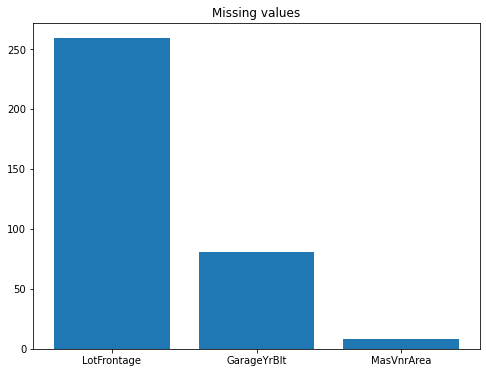

LotFrontage missing num is 259, missing rate is 17.74%
GarageYrBlt missing num is 81, missing rate is 5.55%
MasVnrArea missing num is 8, missing rate is 0.55%


In [4]:
print(new_df.dtypes)

missing=new_df.isnull().sum()
missing.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.bar(list(missing.index),missing.values)
plt.title('Missing values')
plt.show()

target=['LotFrontage','GarageYrBlt','MasVnrArea']
for i in target:
    rate= round((new_df.isnull().sum()[i]/len(new_df))*100,2)
    num= new_df.isnull().sum()[i]
    print(f'{i} missing num is {num}, missing rate is {rate}%')

## 繪圖

In [6]:
# 繪圖
""" Your code hear: """
def plot_hist(T,T1,T2,t,t1,t2):
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.histplot(T,stat='probability',kde=True,color='b',alpha=0.4,label='original')
    sns.histplot(T1,stat='probability',kde=True,color='g',alpha=0.4,label='mean')
    sns.histplot(T2,stat='probability',kde=True,color='r',alpha=0.4,label='medain')
    plt.legend()
    plt.title('train')
    
    plt.subplot(1,2,2)
    sns.histplot(t,stat='probability',kde=True,color='b',alpha=0.4,label='original')
    sns.histplot(t1,stat='probability',kde=True,color='g',alpha=0.4,label='mean')
    sns.histplot(t2,stat='probability',kde=True,color='r',alpha=0.4,label='median')
    plt.legend()
    plt.title('test')
    
    plt.show()

def mean_median_analysis(feature):
    train_origin=train[feature].dropna()
    train_mean= train[feature].fillna(drop_df[feature].mean())
    train_median= train[feature].fillna(drop_df[feature].median())
    
    test_origin=test[feature].dropna()
    test_mean= test[feature].fillna(drop_df[feature].mean())
    test_median= test[feature].fillna(drop_df[feature].median())
    
    plot_hist(train_origin,train_mean,train_median,test_origin,test_mean,test_median)

LotFrontage:


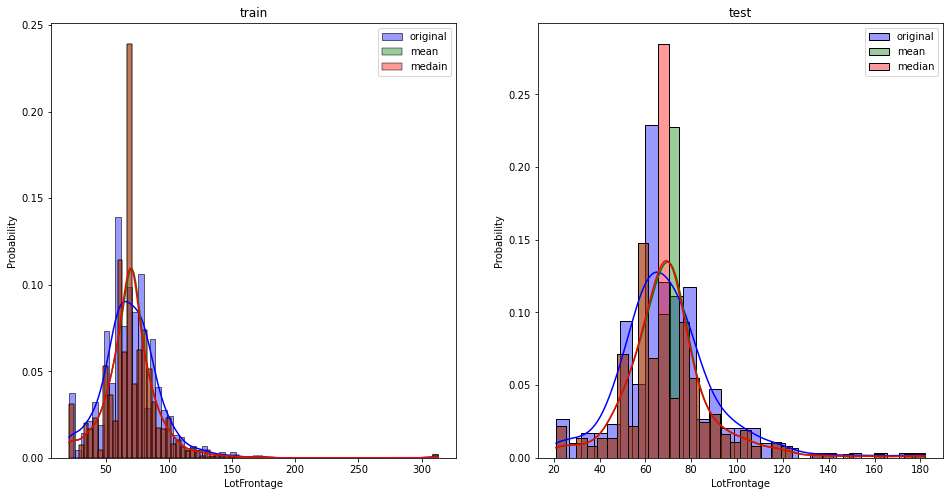



GarageYrBlt:


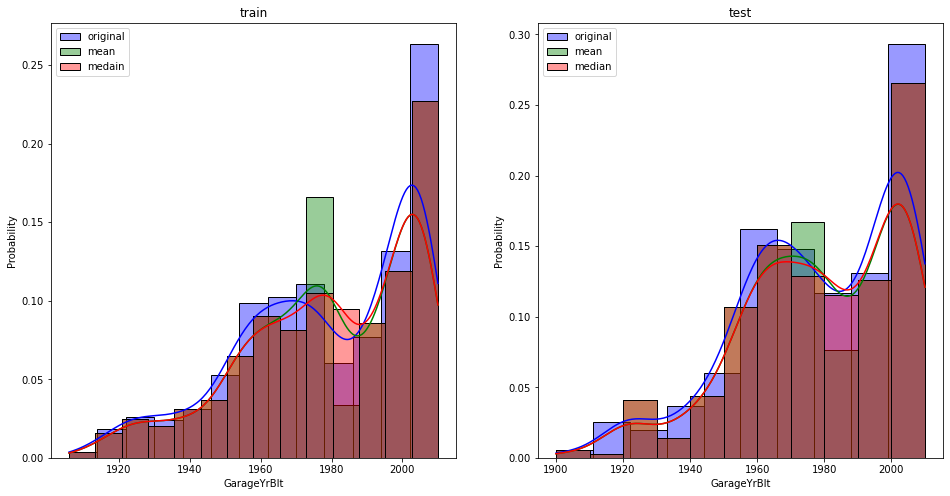



MasVnrArea:


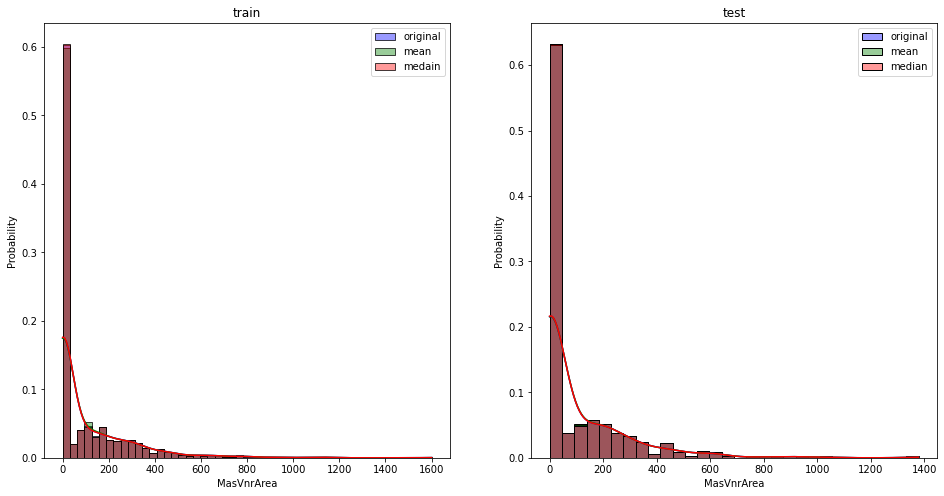

In [7]:
drop_df=new_df.dropna().reset_index(drop = True)
for i in target:
    print(f'{i}:')
    mean_median_analysis(i)
    print('\n')

## 分析標準差

In [44]:
""" Your code hear: """

std_origin= new_df.std()

#print(drop_df.mean())
#print(drop_df.median())

d1=new_df.fillna(drop_df.mean())
d2=new_df.fillna(drop_df.median())

std_fill_mean=d1.std()
std_fill_median=d2.std()

print(f'original : \n{std_origin}')
print('\n')
print(f'fill with mean : \n{std_fill_mean}')
print('\n')
print(f'fill with median : \n{std_fill_median}')


original : 
LotFrontage     24.284752
GarageYrBlt     24.689725
MasVnrArea     181.066207
dtype: float64


fill with mean : 
LotFrontage     22.025279
GarageYrBlt     23.994596
MasVnrArea     180.569461
dtype: float64


fill with median : 
LotFrontage     22.024031
GarageYrBlt     24.001378
MasVnrArea     180.731373
dtype: float64


## 透過分析標準差可以得到什麼結果？

### 三個feature  不管是用mean或是median填補都與原本的標準差有所差異，其中feature ''LotFrontage''為差異最多 與原本差異2，其次為feature ''MasVnrArea'' 差異為1。